### Apendix C. NN and CNN Models

Here, the image datasets generated in **Appendix A** (Data/combined.csv) are fitted to a simple neural network (NN) model, as well as to a more sophisticated convolutional neural network (CNN) model.


**Table of Contents**

1. Load, Inspect, and Prepare Data    
2. Build a baseline NN model  
3. Build a CNN model  
4. Validate model using an unlabeled image  
5. References  
6. Summary and Next Steps  


***

#### 1. Load, Inspect, and Prepare Data  

#### 1.1. Load and Inspect Data

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

#load data
df=pd.read_csv("Data/combined.csv") 

#reshape data
#retrieve first row, first 3818 columns and turn into a numpy array
img_data=np.array(df.iloc[:,:3818], dtype='float64') #make sure to specify data type as float when converting to an np array
#reshape data
img_data_2d=img_data[0].reshape(46,83)

#visualize any one of the data 
plt.imshow(img_data_2d, cmap='gray')
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

#### 1.2. Prepare Data

In [2]:
#split data into train and test sets
#https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

from sklearn.model_selection import train_test_split

X=df.iloc[:,:3818]
Y=df.iloc[:,3820]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=123)
#y_test #check

#check dimensions
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(285, 3818)
(51, 3818)
(285,)
(51,)


In [3]:
#treat data types
new_X_train = X_train.astype('float64')
new_X_test = X_test.astype('float64')

new_X_train /= 255
new_X_test /= 255

In [4]:
#transform labels to labelBinarizer
#https://datascience.stackexchange.com/questions/17516/how-to-deal-with-string-labels-in-multi-class-classification-with-keras
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transformed_label = encoder.fit_transform(["spoon", "fork", "floss"])

#print(transformed_label) #check

#apply object to train and test datasets
new_Y_train=encoder.transform(y_train) 
new_Y_test=encoder.transform(y_test) 

#check dimensions
print(new_Y_train.shape)
print(new_Y_test.shape)

(285, 3)
(51, 3)


In [5]:
#set seed for reproducibility
#https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

C:\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### 2. Build a baseline NN model

In [6]:
#dynamically set tensorflow backend
#https://stackoverflow.com/questions/49121112/how-do-i-set-the-keras-backend-in-python-dynamically-when-loaded-using-superviso
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras import backend as K

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense


# define baseline model
def baseline_model(num_pixels,num_classes):
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',
    activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
num_pixels=3818
num_classes=3
model_nn = baseline_model(num_pixels,num_classes)

Using TensorFlow backend.


Train on 285 samples, validate on 51 samples
Epoch 1/20
285/285 [==============================] - 3s 10ms/step - loss: 2.1140 - acc: 0.4140 - val_loss: 2.4023 - val_acc: 0.5294

Epoch 00001: val_acc improved from -inf to 0.52941, saving model to Models/nn_weights-improvement-01-0.53.hdf5
Epoch 2/20
285/285 [==============================] - 2s 7ms/step - loss: 2.0127 - acc: 0.7018 - val_loss: 2.2279 - val_acc: 0.7647

Epoch 00002: val_acc improved from 0.52941 to 0.76471, saving model to Models/nn_weights-improvement-02-0.76.hdf5
Epoch 3/20
285/285 [==============================] - 2s 7ms/step - loss: 1.8612 - acc: 0.8105 - val_loss: 2.0565 - val_acc: 0.8235

Epoch 00003: val_acc improved from 0.76471 to 0.82353, saving model to Models/nn_weights-improvement-03-0.82.hdf5
Epoch 4/20
285/285 [==============================] - 2s 7ms/step - loss: 1.7010 - acc: 0.8632 - val_loss: 1.9242 - val_acc: 0.8627

Epoch 00004: val_acc improved from 0.82353 to 0.86275, saving model to Models/nn_we

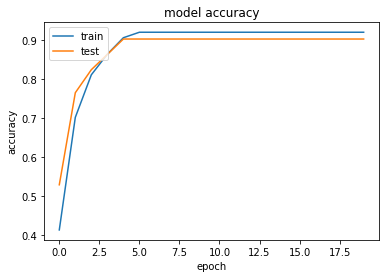

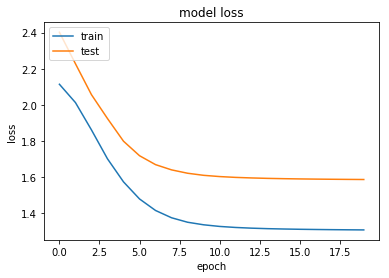

In [7]:
# Checkpoint the weights when validation accuracy improves
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="Models/nn_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint_nn = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
mode='max')
callbacks_list = [checkpoint_nn]


# Fit the model
history_nn=model_nn.fit(new_X_train, new_Y_train, validation_data=(new_X_test, new_Y_test), 
                          callbacks=callbacks_list, epochs=20, batch_size=50)

# list all data in history
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history_nn.history.keys())


# summarize history for accuracy
plt.plot(history_nn.history['acc'])
plt.plot(history_nn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_nn.history['loss'])
plt.plot(history_nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#### 3. Build a CNN model


In [8]:
#reshape data for cnn model
new_X_train=np.array(new_X_train).reshape(new_X_train.shape[0],46,83,1)
new_X_test=np.array(new_X_test).reshape(new_X_test.shape[0],46,83,1)

#check dimensions
print(new_X_train.shape)
print(new_X_test.shape)

(285, 46, 83, 1)
(51, 46, 83, 1)


In [9]:
#taken from MNIST dataset example of deep learning with python book CNN model-machinelearningmastery
# define a simple CNN model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm


def model_cnn(num_classes):
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(46, 83, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

num_classes=3

# build the model
model_cnn = model_cnn(num_classes)

Train on 285 samples, validate on 51 samples
Epoch 1/20
285/285 [==============================] - 2s 7ms/step - loss: 1.3439 - acc: 0.3544 - val_loss: 1.2506 - val_acc: 0.2745

Epoch 00001: val_acc improved from -inf to 0.27451, saving model to Models/cnn_weights-improvement-01-0.27.hdf5
Epoch 2/20
285/285 [==============================] - 1s 5ms/step - loss: 1.1096 - acc: 0.4737 - val_loss: 1.1147 - val_acc: 0.4902

Epoch 00002: val_acc improved from 0.27451 to 0.49020, saving model to Models/cnn_weights-improvement-02-0.49.hdf5
Epoch 3/20
285/285 [==============================] - 1s 5ms/step - loss: 1.0669 - acc: 0.5649 - val_loss: 1.0219 - val_acc: 0.5294

Epoch 00003: val_acc improved from 0.49020 to 0.52941, saving model to Models/cnn_weights-improvement-03-0.53.hdf5
Epoch 4/20
285/285 [==============================] - 1s 5ms/step - loss: 0.9694 - acc: 0.6211 - val_loss: 0.9251 - val_acc: 0.7059

Epoch 00004: val_acc improved from 0.52941 to 0.70588, saving model to Models/cnn

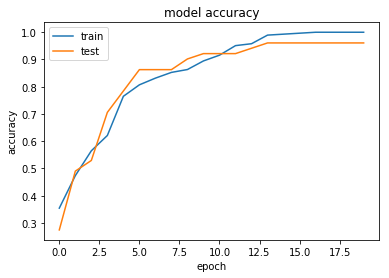

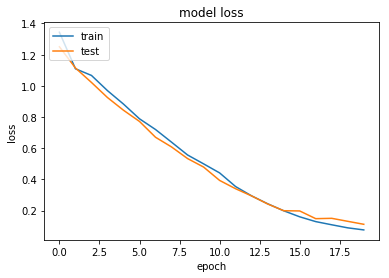

In [10]:
# Checkpoint the weights when validation accuracy improves
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="Models/cnn_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint_cnn = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
mode='max')
callbacks_list = [checkpoint_cnn]


# Fit the model
history_cnn=model_cnn.fit(new_X_train, new_Y_train, validation_data=(new_X_test, new_Y_test), 
                          callbacks=callbacks_list, epochs=20, batch_size=50)

# list all data in history
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history_cnn.history.keys())


# summarize history for accuracy
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 4. Validate model using an unlabeled image

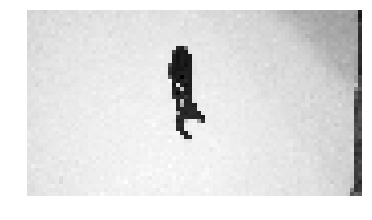

In [13]:
import cv2

img=cv2.imread("Images/floss/floss_4.jpg")
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray=cv2.resize(img_gray,(83,46))

img_gray.shape

plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()


In [17]:
from keras.models import load_model
load_model = load_model('Models/cnn_weights-improvement-14-0.96.hdf5')

print('The image is a:', encoder.inverse_transform(load_model.predict(img_gray.reshape(1,46,83,1)))[0])

The image is a: floss


#### 5. References

1. Jason Brownlee, "Deep Learning with Python", Machine Learning Mastery, 2018.

#### 6. Summary   
- Retrieve image data from a csv file.
- Feed data into a neural network (NN) model.
- The accuracy of the NN model does not exceed 90%.
- Reshape and feed data into a more sophisticated CNN model. 
- The accuracy of CNN model is up to 96%.
- Utilize ModelCheckpoint to retain weights when model accuracy improves during training.
- Demonstrate implementing the model on an unlabeled image.
- In **Appendix D**, an even more sophisticated pretrained model that consists of many more layers than the above CNN model is discussed.